In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

from wordcloud import WordCloud

from textblob import TextBlob

[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


In [3]:
reviews = pd.read_csv(r'~/Desktop/reviews/yelp_reviews.csv')

In [4]:
reviews.shape

(3618, 4)

In [5]:
reviews.sample(20)

,date,rating,review,user
1533,8/10/2007,5.0,If I lived on the UWS I would probably be 400l...,Howie F.
982,10/28/2011,5.0,THE BEST COOKIES IN NEW YORK. THE BEST COOKIES...,Catherine B.
2162,6/16/2011,5.0,I think this place would get 5 stars just from...,Luisa C.
1559,1/29/2010,3.0,I went here with very high expectations based ...,Sri N.
1737,6/18/2011,4.0,Moist. Chunky. Chewy. Just the right amount of...,Lisa H.
3469,4/30/2014,4.0,This is a small little place. I came here arou...,Cat L.
264,12/3/2017,5.0,City Cakes' half-pound cookies are still bette...,Bonnie G.
3145,11/24/2013,5.0,The best cookies I've ever had (besides my wif...,Johnny B.
2000,10/27/2013,5.0,"I tried their chocolate walnut cookie today, a...",Arthur A.
1996,9/24/2011,4.0,A friend who'd recently visited NYC gave me th...,Yasmin C.


In [6]:
reviews['review'] = reviews['review'].str.lower()
reviews['review'] = reviews['review'].apply(lambda x: re.sub('[^\w\s]', '', x))

In [7]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.extend(['cookie', 'cookies', 'ive', 'im'])
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
reviews['review'] = reviews['review'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))

In [9]:
fivestar = reviews.loc[reviews['rating'] == 5.0]
fourstar = reviews.loc[reviews['rating'] == 4.0]
lowstar = reviews.loc[reviews['rating'] < 4.0]



reviews.loc[(reviews['rating'] > 3.0)]


,date,rating,review,user
0,11/2/2019,5.0,chocolate walnut incredible strongly recommend...,Eliza D.
1,9/10/2019,5.0,went nyc first time ever decided visit hotspot...,Kiki S.
2,7/5/2018,4.0,great bakery tons options prices could bit low...,Emanuel C.
3,4/14/2019,4.0,pros food yum ie probably big round thing chol...,Chloe A.
4,3/1/2019,5.0,decadent everything hyped possibly get firm ou...,Tisha G.
...,...,...,...,...
3611,11/30/2015,5.0,humongous delicious melty soft nuff said,Gloria C.
3612,3/2/2015,5.0,absolutely best ever lifenothing better gettin...,McKinley J.
3614,9/7/2014,5.0,reedicyewwluss overexaggerate reaction honestl...,Kerry A.
3616,3/1/2015,5.0,chocolate chip walnut best far exercise self c...,Jennifer G.


In [18]:
fivestar_wc = WordCloud(background_color="white", max_words=50, width=800, height=400)
fivestar_wc.generate(' '.join(fivestar['review']))

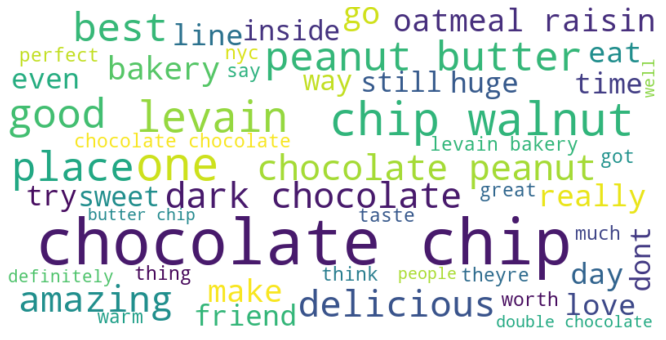

In [11]:
plt.figure(figsize=(12, 6))
plt.imshow(fivestar_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
lowstar_wc = WordCloud(background_color="white", max_words=50, width=800, height=400)
lowstar_wc.generate(' '.join(lowstar['review']))

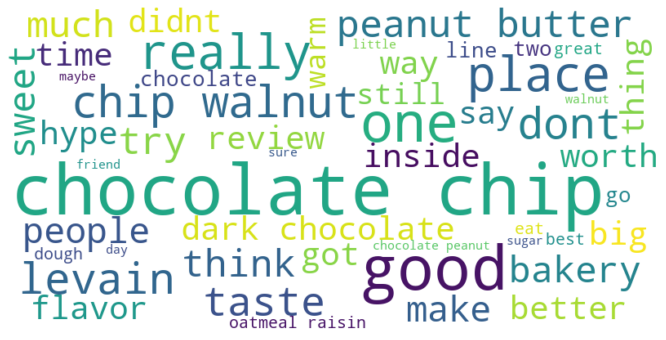

In [20]:
plt.figure(figsize=(12, 6))
plt.imshow(lowstar_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Experimental NLP Analyses:

In [50]:
rawtext = pd.read_csv(r'~/Desktop/reviews/yelp_reviews.csv')
fivestar_original = rawtext.loc[(rawtext['rating'] == 5.0)]
lowstar_original = rawtext.loc[(rawtext['rating'] < 4.0)]

def sentiment_func(x):
    sentiment = TextBlob(x['review'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

reviews_sentiment = rawtext.apply(sentiment_func, axis=1)

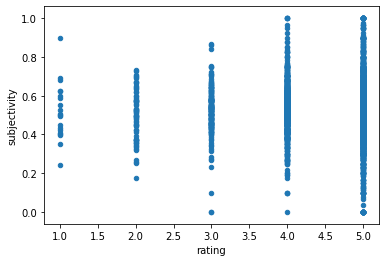

In [51]:
reviews_sentiment.plot.scatter('rating', 'subjectivity')

In [17]:
TextBlob(rawtext['review'][3162]).ngrams(3)

[WordList(['good', 'lord', 'stop']),
 WordList(['lord', 'stop', 'drooling']),
 WordList(['stop', 'drooling', 'over']),
 WordList(['drooling', 'over', 'these']),
 WordList(['over', 'these', 'photos']),
 WordList(['these', 'photos', 'and']),
 WordList(['photos', 'and', 'foodie']),
 WordList(['and', 'foodie', 'porn']),
 WordList(['foodie', 'porn', 'reviews']),
 WordList(['porn', 'reviews', 'and']),
 WordList(['reviews', 'and', 'just']),
 WordList(['and', 'just', 'go']),
 WordList(['just', 'go', 'get']),
 WordList(['go', 'get', 'a']),
 WordList(['get', 'a', 'cookie']),
 WordList(['a', 'cookie', 'already']),
 WordList(['cookie', 'already', 'i']),
 WordList(['already', 'i', 'have']),
 WordList(['i', 'have', 'nothing']),
 WordList(['have', 'nothing', 'new']),
 WordList(['nothing', 'new', 'to']),
 WordList(['new', 'to', 'contribute']),
 WordList(['to', 'contribute', 'other']),
 WordList(['contribute', 'other', 'than']),
 WordList(['other', 'than', 'this']),
 WordList(['than', 'this', 'is']),
 